Файл с данными подгружается предварительно в коллаб для дальнейшего считывания

In [ ]:
import pandas as pd

# считываем данные из файла
data = pd.read_excel("/content/data.xlsx")

data.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,273.0,10133.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-06-01 00:00:00
3,257.0,5048.7,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-06-02 00:00:00
4,73.0,8453.7,ОПЛАЧЕНО,Селиванов,текущая,NaN,оригинал,2021-06-03 00:00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


Исправляем тип данных для дат

In [ ]:
data['receiving_date'] = pd.to_datetime(data['receiving_date'], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       724 non-null    float64       
 1   sum             724 non-null    float64       
 2   status          730 non-null    object        
 3   sale            724 non-null    object        
 4   new/current     724 non-null    object        
 5   Unnamed: 5      0 non-null      float64       
 6   document        709 non-null    object        
 7   receiving_date  606 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 45.8+ KB


Просматриваем возможные статусы. (Пригодится в решении)

In [ ]:
data['status'].unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

#1
Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

Если подразумевается любой иной статус, кроме Просрочено, то подсчет ведется так

In [ ]:
# фильтруем строки по условиям: месяц = июль, НЕ просрочено
filtered_data = data[(data["receiving_date"].dt.month == 7) &
                     (data["status"] != "ПРОСРОЧЕНО") ]

# считаем общую выручку
total = filtered_data["sum"].sum()
total

757830.7399999996

Если подразумевается, что именно оплачено, то подсчет ведется так

In [ ]:
# фильтруем строки по условиям: месяц = июль, оплачено
filtered_data = data[(data["receiving_date"].dt.month == 7) &
                     (data["status"] == "ОПЛАЧЕНО") ]

# считаем общую выручку
total = filtered_data["sum"].sum()
total

757830.7399999996

В данном случае они совпали))

#2
Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.

Так как выручка подсчитывается в конце месяца обычно, сгруппируем данные по месяцам для наглядности

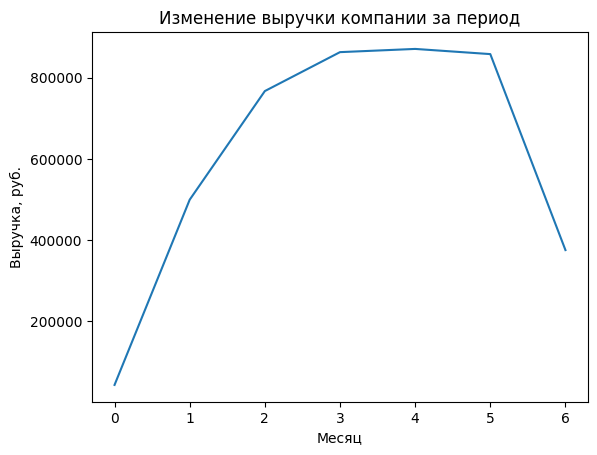

In [ ]:
import matplotlib.pyplot as plt

# группируем данные по месяцам и считаем сумму выручки
income_by_month = data.groupby(data["receiving_date"].dt.to_period("M"))["sum"].sum()

# строим график
plt.plot(income_by_month.values)
plt.xlabel("Месяц")
plt.ylabel("Выручка, руб.")
plt.title("Изменение выручки компании за период")
plt.show()

#3
Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [ ]:
# фильтруем строки по условиям месяц = сентябрь
filtered_data = data[(data["receiving_date"].dt.month == 9) ]

# считаем сумму выручки для каждого менеджера
income_manager = filtered_data.groupby("sale")["sum"].sum()

# выбираем менеджера с наибольшей выручкой
best_manager = income_manager.idxmax()
best_manager

'Петрова'

#4
Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [ ]:
# фильтруем строки по условиям месяц = октябрь
filtered_data = data[(data["receiving_date"].dt.month == 10)]

# считаем количество строк для каждого типа сделок
counted = filtered_data["new/current"].value_counts()

# выбираем тип сделок, который встречается чаще
more = counted.idxmax()
more

'текущая'

#5
Сколько оригиналов договора по майским сделкам было получено в июне 2021?

Если правильно поняла интерпретацию статусов, то на его основе получаем информацию о конкретной сделке

In [ ]:
# фильтруем строки по условиям месяц = июнь
filtered_data = data[(data["receiving_date"].dt.month == 5) &
                (data['status'] == 'Май 2021')]

# считаем количество строк
counted = len(filtered_data)
counted

0

#Final task
За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

Если правильно поняла, то остаток считатется как разность между потенциальным максимальным бонусом (у всех сделок есть оригинал договора) и реальным бонусом (реальное наличие оригинала договора)

In [ ]:
# функция для расчета реальных бонусов по сделкам
def real_bonus(row):

  #фильтруем по условиям с наличием договора и, в случае Новой сделки, статуса Оплачено,
    if row["new/current"] == "новая" and row["status"] == "ОПЛАЧЕНО" and row["document"]:
        return row["sum"] * 0.07

  # а в случае Текущей в зависимости от величины суммы
    elif row["new/current"] == "текущая" and row["document"]:
        if row["sum"] > 10000:
            return row["sum"] * 0.05
        else:
            return row["sum"] * 0.03
    else:
        return 0

# фильтруем строки по условиям месяц = 6 (так как нужно до 01.07), наличие договора и не просрочено
filtered_data_real = data[(data["receiving_date"].dt.month == 6) &
                 (data["status"] != "ПРОСРОЧЕНО") &
                 (data["document"])]

# добавляем новый столбец с бонусами
filtered_data_real["bonus"] = filtered_data_real.apply(real_bonus, axis=1)

# группируем данные по менеджерам и считаем сумму бонусов
bonus = pd.DataFrame({'bonus' : filtered_data_real.groupby("sale")["bonus"].sum()}).reset_index()

# функция для расчета потенциальных бонусов по сделкам
def potential_bonus(row):

  #фильтруем по условиям в случае Новой сделки, статус при этом любой
    if row["new/current"] == "новая" :
        return row["sum"] * 0.07

  # а в случае Текущей в зависимости от величины суммы
    elif row["new/current"] == "текущая" :
        if row["sum"] > 10000:
            return row["sum"] * 0.05
        else:
            return row["sum"] * 0.03
    else:
        return 0

# фильтруем строки по условиям месяц = 6, статус любой!
potential_data = data[(data["receiving_date"].dt.month == 6)]

# добавляем новый столбец с бонусами
potential_data["potential_bonus"] = potential_data.apply(potential_bonus, axis=1)

# группируем данные по менеджерам и считаем сумму всех бонусов
potential_bonus = pd.DataFrame({'potential_bonus' : potential_data.groupby("sale")["potential_bonus"].sum()}).reset_index()

#совмещаем (джойним) полученные данные по колонке менеджеров
merged = pd.merge(bonus, potential_bonus, on='sale')

#считаем остаток, путем вычетания соответствующих потенциальных и реальных бонусов
merged['rest'] = merged['potential_bonus'] - merged['bonus']

print(merged)

         sale      bonus  potential_bonus     rest
0     Андреев  2962.1717        2962.1717    0.000
1    Васильев   339.2310         339.2310    0.000
2      Иванов  2503.8390        2503.8390    0.000
3   Кузнецова  2604.6716        2604.6716    0.000
4     Петрова  7028.8020        7028.8020    0.000
5   Селиванов   353.3220         353.3220    0.000
6     Смирнов  4078.7240        4775.1330  696.409
7  Филимонова   306.0720         306.0720    0.000


<ipython-input-20-ab7ef1bac04c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_real["bonus"] = filtered_data_real.apply(real_bonus, axis=1)
<ipython-input-20-ab7ef1bac04c>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential_data["potential_bonus"] = potential_data.apply(potential_bonus, axis=1)
